In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import KMNIST
# from Model.CustomLene import CustomLenet
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from pytorch_utils import get_device
from model.Custom_Lenet import CustomLenet



In [10]:
# Hiperparametros
lr = 0.001
batch_size = 64
epochs = 70
device = get_device()
train_split = 0.9
fullData = KMNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())
testData = KMNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())


MPS


ConnectionResetError: [Errno 54] Connection reset by peer

In [5]:
total_train = len(fullData)
nTrainSamples = int(train_split * total_train)
nValSamples = total_train - nTrainSamples

train_Data, valData = random_split(fullData, [nTrainSamples, nValSamples])

trainDataLoader = DataLoader(train_Data, batch_size=batch_size, shuffle=True)
valDataLoader = DataLoader(valData, batch_size=batch_size, shuffle=False)


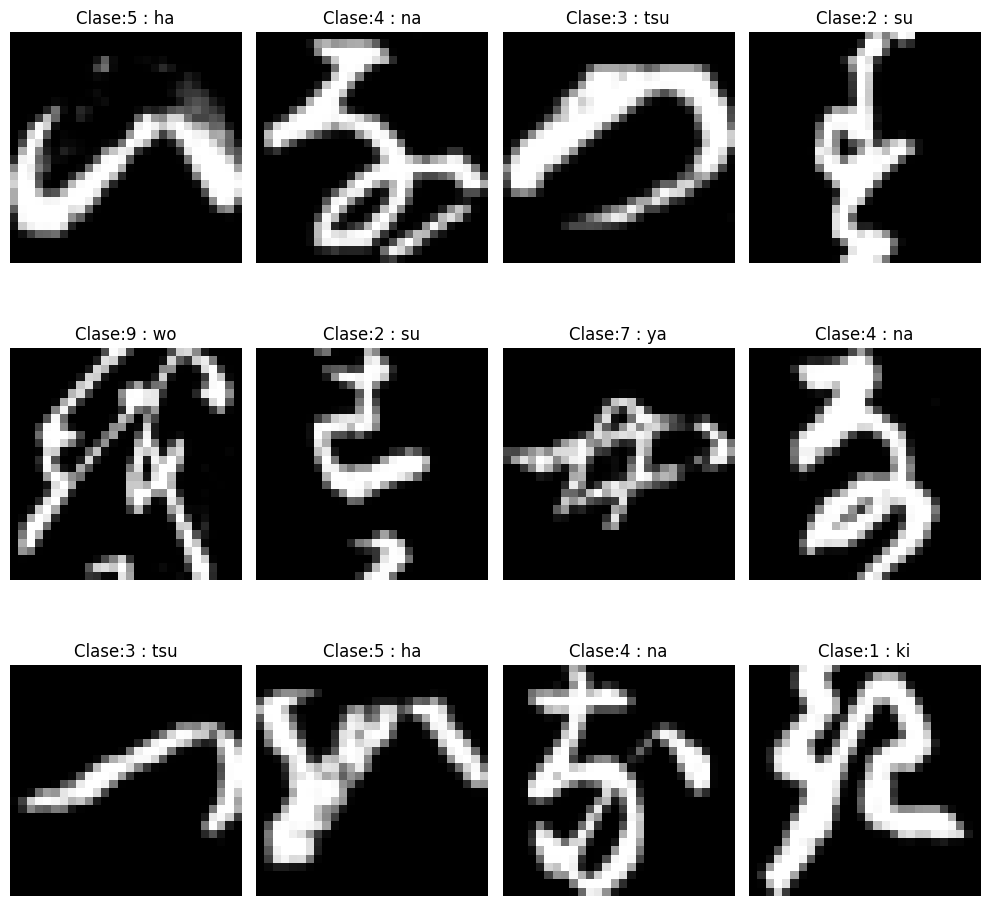

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(12):
    img, label = train_Data[i]
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(img.squeeze(0), cmap='gray')
    ax.set_title(f'Clase:{label} : {train_Data.dataset.classes[label]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import torchsummary

model = CustomLenet(nChanels==1, nClasses=10).to(device)

optimizer = Adam(model.parameters(), lr = lr)
criterion = CrossEntropyLoss()

summary = torchsummary.summary(model, input_size=train_Data.dataset[0][0])
print(summary)

TypeError: CustomLenet.__init__() got an unexpected keyword argument 'nChanles'

In [12]:
history = {'train_acc'  : [], 'train_loss' : [], 'val_acc' : [], 'val_loss' : []}

for e in range(epochs):
    model.train()
    total_train_loss = 0
    total_val_loss = 0

    train_correct = 0
    val_correct = 0
    for imgs, labels, in trainDataLoader:
        (imgs, labels) = (imgs.to(device), labels.to(device))
        preds = model(imgs)
        loss = criterion(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss
        train_correct += (preds.argmax(dim=1) == labels).type(torch.float).sum().item()

    with torch.no_grad():
        model.eval()
        
        for val_imgs, val_labels in valDataLoader:
            val_imgs, val_labels = (val_imgs.to(device), val_labels.to(device))
            preds_val = model(val_imgs)
            total_val_loss += criterion(preds_val, val_labels)
            val_correct += (preds_val.argmax(dim=1) == val_labels).type(torch.float).sum().item()
    
    avg_train_loss = total_train_loss / (len(trainDataLoader.dataset)//batch_size)
    avg_val_loss = total_val_loss / (len(trainDataLoader.dataset)//batch_size)
    
    avg_train_accuracy = train_correct / len(trainDataLoader.dataset)
    avg_val_accuracy = val_correct / len(trainDataLoader.dataset)

    history['train_loss'].append(avg_train_loss.detach().cpu().numpy())
    history['train_acc'].append(avg_train_accuracy)
    history['val_loss'].append(avg_train_loss.detach().cpu().numpy())
    history['val_acc'].append(avg_val_accuracy)

    print(f'[INFO] Epoch: {e+1}/{epochs} | Train Loss: {avg_train_loss:4f} | Train acc: {avg_train_accuracy:4f} | Val Loss: {avg_val_loss:4f} | Val acc: {avg_val_accuracy:4f}')

[INFO] Epoch: 1/70 | Train Loss: 0.008419 | Train acc: 0.998389 | Val Loss: 0.042945 | Val acc: 0.108556
[INFO] Epoch: 2/70 | Train Loss: 0.009198 | Train acc: 0.998370 | Val Loss: 0.042953 | Val acc: 0.108389
[INFO] Epoch: 3/70 | Train Loss: 0.007359 | Train acc: 0.998593 | Val Loss: 0.043536 | Val acc: 0.108537
[INFO] Epoch: 4/70 | Train Loss: 0.011402 | Train acc: 0.997981 | Val Loss: 0.041537 | Val acc: 0.108926
[INFO] Epoch: 5/70 | Train Loss: 0.009242 | Train acc: 0.998463 | Val Loss: 0.048610 | Val acc: 0.108407
[INFO] Epoch: 6/70 | Train Loss: 0.011795 | Train acc: 0.998259 | Val Loss: 0.046229 | Val acc: 0.108519
[INFO] Epoch: 7/70 | Train Loss: 0.008546 | Train acc: 0.998444 | Val Loss: 0.047039 | Val acc: 0.108741
[INFO] Epoch: 8/70 | Train Loss: 0.010283 | Train acc: 0.998352 | Val Loss: 0.041714 | Val acc: 0.108833
[INFO] Epoch: 9/70 | Train Loss: 0.011377 | Train acc: 0.998259 | Val Loss: 0.039408 | Val acc: 0.108963
[INFO] Epoch: 10/70 | Train Loss: 0.013868 | Train acc:

KeyboardInterrupt: 

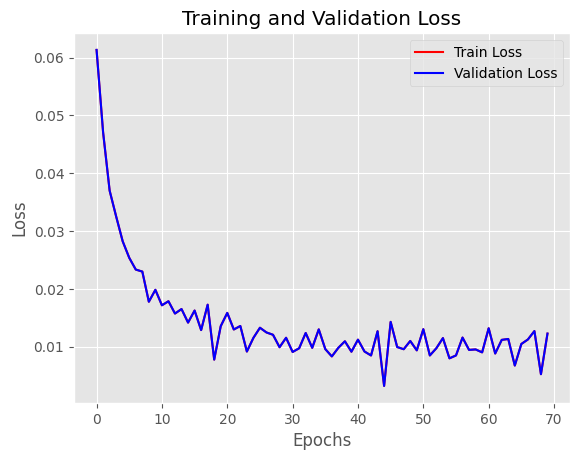

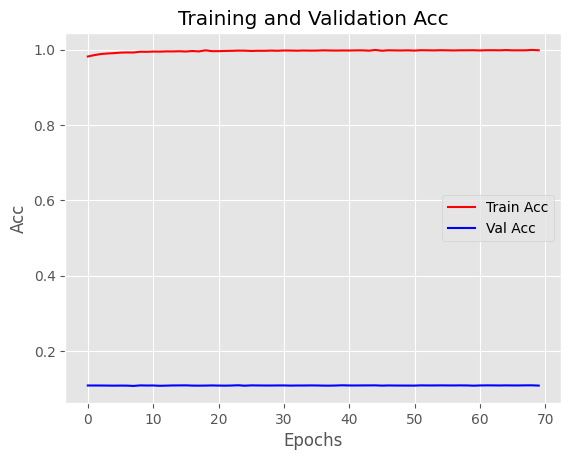

In [10]:
plt.style.use('ggplot')

plt.figure()
plt.plot(history['train_loss'], label='Train Loss', color ='red')
plt.plot(history['val_loss'], label='Validation Loss', color ='blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.grid(True)
plt.show()

# Acc

plt.figure()
plt.plot(history['train_acc'], label = 'Train Acc', color='red')
plt.plot(history['val_acc'], label = 'Val Acc', color = 'blue')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(loc = 0)
plt.grid(True)
plt.show()